# Python for Spatial Analysis
## Second part of the module of GG3209 Spatial Analysis with GIS.
### Notebook to learn and practice GeoPandas - Rasterio
---
Dr Fernando Benitez -  University of St Andrews - School of Geography and Sustainable Development - First Iteration 2023 v.1.0 

### Introduction 

Nowadays there are so many libraries to work with spatial data using Python, describing all those libraries would be require a huge among of time. However in this module we will describe the most relevant ones, and from here you will get the basics that are needed to work in the future with similar libraries. 

All libraries have their own pros and cons. Below is a list of some common tools for geospatial analysis in Python.

1. [**ArcPy**](https://pro.arcgis.com/en/pro-app/tool-reference/main/arcgis-pro-tool-reference.htm): Python site package integrated into the **ArcGIS Pro** software environments. ArcPy can be used within ArcGIS Pro via the Python window. ArcGIS Pro now includes **Jupyter Notebook** as part of the base installation. You can also work within notebooks inside of ArcGIS Pro. One relevant Con is Esri Technologies are not free or open-source, so in this module we are limited to work or discuss but in the future module you will learn how to use it. ArcGIS and particularly ArcPY are very powerful and worth investigating. I personally use ArcPy a lot in my own work. Besides it might the most documented tool among the rest.
   
2. [**GeoPandas**](https://geopandas.org/): You new bestie in Python. Expands **Pandas** to allow for working with vector data using the **Series** and **DataFrame** structures. I will provide an introduction to GeoPandas in this module, which will build upon our prior discussion of Pandas. GeoPandas relies on several dependencies including the following which we have already discussed: **NumPy**, **Pandas**, and **matplotlib**. It also relies on the following libraries/modules:
    - [**Shapely**](https://shapely.readthedocs.io/en/latest/): used to perform geometric and overlay operations.
    - [**Fiona**](https://fiona.readthedocs.io/en/latest/): used to read and write geospatial data files via links to the **Geospatial Data Abstraction Library (GDAL)**
    - [**PyProj**](https://github.com/pyproj4/pyproj): interface to **PROJ** and allows for reading and transformation of geographic and projected coordinate systems. 
    - [**MapClassify**](https://pysal.org/mapclassify/): allows for choropleth mapping. 
    - [**Descartes**](https://pypi.org/project/descartes/): use vector geospatial features with matplotlib.
  
3. [**Rasterio**](https://rasterio.readthedocs.io/en/latest/intro.html): allows for reading, writing, and manipulation of raster geospatial data. This package relies heavily on NumPy so that rasters can be manipulated as arrays. 

4. [**Contextily**](https://github.com/geopandas/contextily): allows for retrieval of **raster tile layers** for use as base maps within matplotlib plots. 

5. [**EarthPy**](https://earthpy.readthedocs.io/en/latest/): expands the functionality of GeoPandas and Rasterio. Very useful for raster and multispectral image analysis. 

6. [**WhiteboxTools**](https://jblindsay.github.io/wbt_book/intro.html): provides more than 440 tools for analyzing geospatial data, including tools for data preparation, vector analysis and overlay, raster and image analysis, geomorphometric analysis, hydrological analysis, and LiDAR processing. These tools can be accessed in Python, R, QGIS, and via a command-line interface. They can also be accessed via a graphical user interface (GUI) known as [**Whitebox GAT**](https://jblindsay.github.io/ghrg/Whitebox/). This tool set was developed by [Dr. John Lindsay](https://jblindsay.github.io/ghrg/index.html) of the Geomorphometry & Hydrogeomatics Research Group at the University of Guelph.

Because we are limited by only one lecture we can briefly cover an intro of GeoPandas and Rasteio, but in future modules we will have more time to dig into those resources. 

## Content

1. Read and write vector geospatial data using **GeoPandas**.
2. Read and write raster geospatial data using **Rasterio**.
3. Visualize geospatial data and make maps using **GeoPandas**, **Rasterio**, and **matplotlib**.
4. Perform a wide variety of spatial analysis tasks using **WhiteboxTools** (This is optional, and will be included in the next version of this module)

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

plt.rcParams['figure.figsize'] = [10, 8]

/var/folders/3r/7l_zzsfj2jg84n728hwz_36m0000gn/T/ipykernel_14873/2684456056.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

plt.rcParams['figure.figsize'] = [10, 8]

## GeoPandas, working with vector data

Vector data is an intuitive and common spatial data format and the one we’ll focus on most in this chapter. Vector data is simply a collection of discrete locations ((x, y) values) called “vertices” that define one of three shapes:

- Point: a single (x, y) point. Like the location of your house.

- Line: two or more connected (x, y) points. Like a road.

- Polygon: three or more (x, y) points connected and closed. Like a lake, or the border of a country.

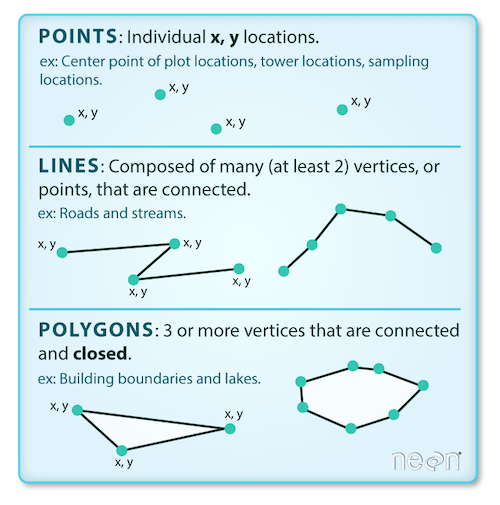

Source: [National Ecological Observatory Network](https://github.com/NEONScience/NEON-Data-Skills).

As you remember from the previous part of this module, vector data is most commonly stored in a “shapefile”. A shapefile is actually composed of 3 required files with the same prefix (here, spatial-data) but different extensions:

- spatial-data.shp: main file that stores records of each shape geometries

- spatial-data.shx: index of how the geometries in the main file relate to one-another

- spatial-data.dbf: attributes of each record

There are other optional files that may also be part of a shapefile but we won’t worry about them for now. Each shapefile can only contain one type of shape. For example, the descriptions for a house (point), a road (line), and a postal code area (polygon) would be stored in three separate shapefiles.

There are other file-types for storing vector data too like geojson. These files can generally be imported into Python using the same methods and packages we use below.


### Reading the data from external file.

In most of the GeoPandas tutorials, they describe how you can create a spatial structure, and how you can create vector geometries. But that only happens for more advances scripts, although it gives you an idea about how GeoPandas work for this part of the course we will focus on using data from external sources. For example the data from the census, or data you have processed in the initial part of this module, using QGIS. 

First, I am reading in a polygon vector layer of Scottish Index of Multiple Deprivation per Data zone using GeoPandas. The *plot()* method is then used to display the data using matplotlib and some default settings. The axes values represent measurements within the coordinate system. 

<AxesSubplot: >

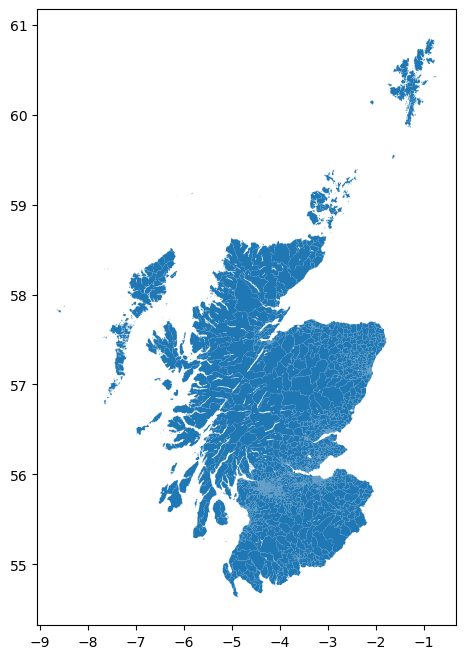

In [4]:
simd_geo = gpd.read_file('data/SG_SIMD_2020/SIMD_20_Geo.shp')
simd_geo.plot()

If you noticed loading this dataset took a lot of time, not only because is a well-detalied dataset, but also included more than 6.000 polygons, so we will need to filtering some rows to make our life easier. 

Using the *head()* method, that you are already familiar with,  you can see that the structure of these data are very similar to a Pandas DataFrame. 

In fact, it is a Pandas DataFrame with one key addition: The geometric information is stored in a column in the table. Based on what you know from the previous part of the course the vector data model integrated here is similar to other **object-based** models in which the geometric and tabulated data are stored in the same object or table. This is similar to a feature class in a file geodatabase or an sf object in R. 

On of the advantages of referencing our vector data using this method is that we can apply the Pandas methods discussed earlier. For example, you can query and subset records, add new columns, group and summarize, and perform table joins. 

In [5]:
simd_geo.head()

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,S01006506,Culter - 01,Aberdeen City,894,580,4691,4,7,14,68,...,4664.0,87,10,10%,1%,3248.0,11801.872345,0.157628,0.000650,"POLYGON ((-2.27749 57.09526, -2.27644 57.09520..."
1,S01006507,Culter - 02,Aberdeen City,793,470,4862,4,7,14,70,...,4602.0,85,4,10%,0%,3486.0,2900.406362,0.037968,0.000033,"POLYGON ((-2.27355 57.10448, -2.27333 57.10447..."
2,S01006508,Culter - 03,Aberdeen City,624,461,5686,5,9,17,82,...,4563.5,31,8,5%,1%,5342.0,3468.761949,0.043980,0.000040,"POLYGON ((-2.27444 57.10170, -2.27238 57.10045..."
3,S01006509,Culter - 04,Aberdeen City,537,307,4332,4,7,13,63,...,5626.0,42,6,7%,1%,4394.5,1647.461389,0.020651,0.000014,"POLYGON ((-2.26612 57.10132, -2.26599 57.10091..."
4,S01006510,Culter - 05,Aberdeen City,663,415,3913,3,6,12,57,...,3885.0,50,7,9%,1%,3736.0,3026.111412,0.040130,0.000027,"POLYGON ((-2.26014 57.10159, -2.26051 57.10133..."


Now, we can subsetting or selecting particular comlumns and rown using some of the methos we applied with Pandas. In the following example we create a new geo-dataframe with a reduced number of columns.

In [6]:
small_sample = simd_geo[["DataZone","DZName","LAName","Quintilev2", "Shape_Area", "geometry"]]
small_sample.head()

,DataZone,DZName,LAName,Quintilev2,Shape_Area,geometry
0,S01006506,Culter - 01,Aberdeen City,4,0.000650,"POLYGON ((-2.27749 57.09526, -2.27644 57.09520..."
1,S01006507,Culter - 02,Aberdeen City,4,0.000033,"POLYGON ((-2.27355 57.10448, -2.27333 57.10447..."
2,S01006508,Culter - 03,Aberdeen City,5,0.000040,"POLYGON ((-2.27444 57.10170, -2.27238 57.10045..."
3,S01006509,Culter - 04,Aberdeen City,4,0.000014,"POLYGON ((-2.26612 57.10132, -2.26599 57.10091..."
4,S01006510,Culter - 05,Aberdeen City,3,0.000027,"POLYGON ((-2.26014 57.10159, -2.26051 57.10133..."


## Filtering data

We can subset the rows (i.e., features) of a GeoDataFrame using a corresponding boolean Series, the same way we subset rows of a DataFrame. Typically, the boolean Series is the result of applying a conditional operator on one or more columns of the same GeoDataFrame.

In [7]:
New_sample = small_sample['LAName'] == 'Aberdeen City'
New_sample

0        True
1        True
2        True
3        True
4        True
        ...  
6971    False
6972    False
6973    False
6974    False
6975    False
Name: LAName, Length: 6976, dtype: bool

Second, we need to pass the series as an index to the GeoDataFrame. As a result, the New_GDF now contains only the rows with LAName as Aberdeen City

In [8]:
New_GDF =  small_sample[New_sample]
New_GDF

,DataZone,DZName,LAName,Quintilev2,Shape_Area,geometry
0,S01006506,Culter - 01,Aberdeen City,4,0.000650,"POLYGON ((-2.27749 57.09526, -2.27644 57.09520..."
1,S01006507,Culter - 02,Aberdeen City,4,0.000033,"POLYGON ((-2.27355 57.10448, -2.27333 57.10447..."
2,S01006508,Culter - 03,Aberdeen City,5,0.000040,"POLYGON ((-2.27444 57.10170, -2.27238 57.10045..."
3,S01006509,Culter - 04,Aberdeen City,4,0.000014,"POLYGON ((-2.26612 57.10132, -2.26599 57.10091..."
4,S01006510,Culter - 05,Aberdeen City,3,0.000027,"POLYGON ((-2.26014 57.10159, -2.26051 57.10133..."
...,...,...,...,...,...,...
278,S01006784,Balgownie and Donmouth East - 04,Aberdeen City,5,0.000023,"POLYGON ((-2.08764 57.17875, -2.08743 57.17864..."
279,S01006785,Denmore - 01,Aberdeen City,5,0.000015,"POLYGON ((-2.09921 57.19996, -2.09938 57.19972..."
280,S01006786,Denmore - 02,Aberdeen City,5,0.000040,"POLYGON ((-2.10097 57.19760, -2.10099 57.19728..."
281,S01006787,Denmore - 03,Aberdeen City,4,0.000027,"POLYGON ((-2.09597 57.19508, -2.09572 57.19428..."


**Geopandas** also provides the **.explore method**, which facilitates interactive exploration of the vector layers we are working with. The .explore method takes many of the same arguments as .plot (such as column and cmap), but also some specific ones (such as style_kwds).

In [9]:
New_GDF.explore(column='Quintilev2', cmap='RdYlBu')


The *crs* attribute lists the spatial coordinate system information for the file.

It is generally a good idea to explore this information to make sure that the projection information is properly loaded.

Projections are referenced using **European Petroleum Survey Group** (**EPSG**) codes. Here, you can see o copy of the SMID_2020 data but in a projected reference system British National Grid (EPSG:27700). The geographic coordinate system or datum is WGS84. The easting and northing measurements are reported in meters. The area of use of the coordinate system is also defined. 

<AxesSubplot: >

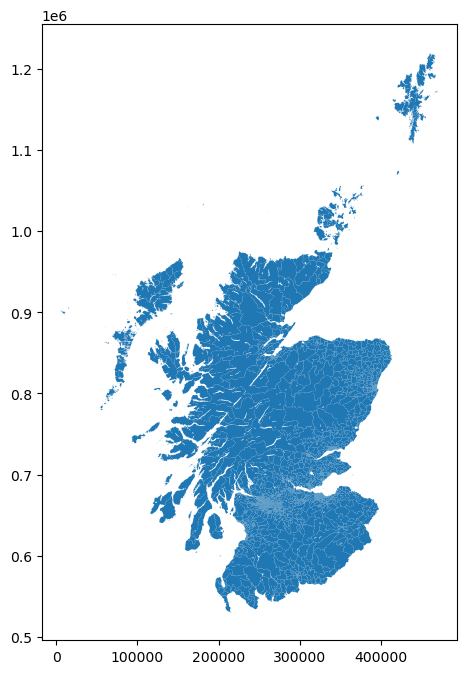

In [10]:
simd_prj = gpd.read_file('data/SG_SIMD_2020/SG_SIMD_2020.shp')
simd_prj.plot()

Filtering the projected dataset

In [11]:
small_prj = simd_prj[["DataZone","DZName","LAName","SAPE2017","Quintilev2", "Shape_Area", "geometry"]]
index_prj = small_prj['LAName'] == 'City of Edinburgh'
small_prj =  small_prj[index_prj]
small_prj

,DataZone,DZName,LAName,SAPE2017,Quintilev2,Shape_Area,geometry
1911,S01008417,Balerno and Bonnington Village - 01,City of Edinburgh,708,4,1.029993e+07,"POLYGON ((315157.369 666212.846, 315173.727 66..."
1912,S01008418,Balerno and Bonnington Village - 02,City of Edinburgh,691,5,2.357050e+07,"POLYGON ((317816.000 666579.000, 318243.000 66..."
1913,S01008419,Balerno and Bonnington Village - 03,City of Edinburgh,541,4,1.366457e+06,"POLYGON ((316831.000 667049.000, 316816.000 66..."
1914,S01008420,Balerno and Bonnington Village - 04,City of Edinburgh,466,5,1.051967e+05,"POLYGON ((316368.000 666124.000, 316379.297 66..."
1915,S01008421,Balerno and Bonnington Village - 05,City of Edinburgh,884,3,1.465441e+05,"POLYGON ((316411.427 666596.771, 316422.940 66..."
...,...,...,...,...,...,...,...
2503,S01009009,Queensferry West - 01,City of Edinburgh,476,2,2.103935e+05,"POLYGON ((312347.900 678734.500, 312360.900 67..."
2504,S01009010,Queensferry West - 02,City of Edinburgh,977,5,2.057121e+05,"POLYGON ((312171.000 678341.000, 312169.000 67..."
2505,S01009011,Queensferry West - 03,City of Edinburgh,880,5,1.532330e+05,"POLYGON ((312230.668 678036.110, 312230.927 67..."
2506,S01009012,Queensferry West - 04,City of Edinburgh,760,5,1.192453e+05,"POLYGON ((311767.000 678043.000, 311798.000 67..."


In [12]:
#simd_geo.crs
small_prj.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

The *bounds()* method provides the rectangular bounds of each feature in the data set relative to the coordinate system as a Pandas DataFrame. 

In contrast, the *total_bounds()* method provides the bounds for the entire dataset as an array.

In [13]:
print(small_prj.bounds.head())

             minx         miny         maxx        maxy
1911  311176.0000  661427.7668  316096.9996  666870.000
1912  311839.7831  659269.0000  318856.8416  666579.000
1913  316308.0276  665017.0000  317550.9996  667084.000
1914  316006.9996  665690.0000  316455.9996  666149.000
1915  315859.9996  665960.0000  316432.2076  666616.411


In [14]:
small_prj.total_bounds

array([309580.7, 659269. , 332793.3, 680648.6])

The GeoPandas *centroid* method returns the **centroid** of each feature in the data set. There are a variety of spatial operations that can be performed using GeoPandas and its dependencies. If you are interested in the operations available, please review the GeoPandas documentation referenced above. 

<AxesSubplot: >

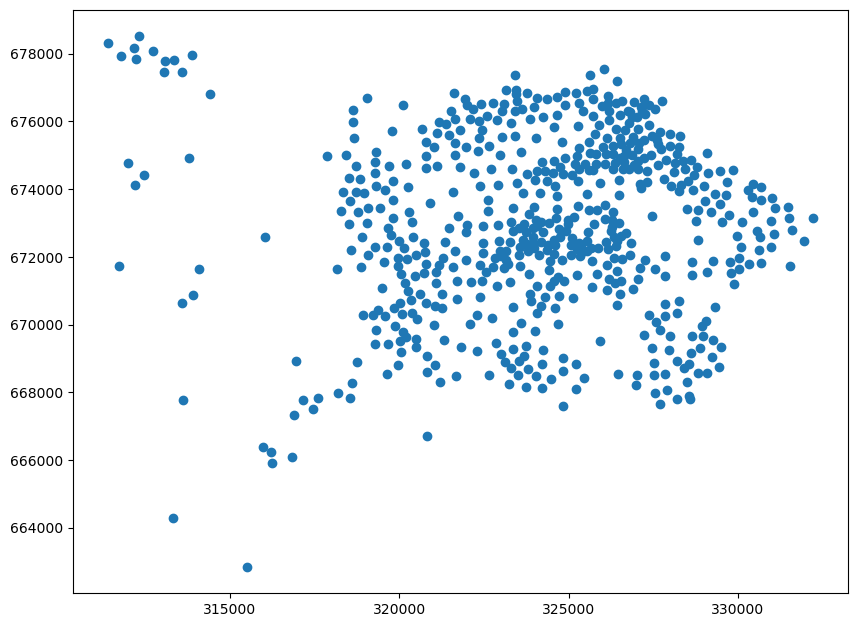

In [15]:
simd_cen = small_prj.centroid
simd_cen.plot()

**Contextily** allows for **raster tile base maps** to be added to maps produced with matplotlib. 

In the example below, the geospatial data are not drawing at the correct location. This is because the raster tile base maps are referenced to the Web Mercator projection whereas the SIMD data are referenced to OSGB36 / British National Grid. Python is not able to perform projection on-the-fly operations, like QGIS/ArcGIS do. So, it is important that data layers have the same spatial reference system. 

You can use the *to_crs()* GeoPandas method and appropriate EPSG code to create a copy of the counties data that have been transformed to the Web Mercator projection. When I recreate the map and add the base map, everything lines up. So, it is important that you consider the impact of projections and make changes where necessary. When performing overlay and spatial analysis, it is preferable that all of your data layers are referenced to the same spatial coordinate reference system. 

In [ ]:
simd_map = small_prj.plot()
ctx.add_basemap(simd_map)

In [ ]:
small_prj.explore(column='Quintilev2', cmap='RdYlBu')

In [ ]:
simd_cWebM = New_GDF.to_crs("EPSG:3857")
simd_map = simd_cWebM.plot()
ctx.add_basemap(simd_map)

The *to_file()* GeoPandas method allows you to save results back to disk. Since GeoPandas uses Fiona and GDAL, a variety of formats can be read and written. Note: You migth get an error here. -- Try to solve it with no assistance---

In [ ]:
simd_cWebM.to_file("data/out/simd_web_mercator.shp")

The GeoPandas *plot()* method allows you to plot or map your vector data using matplotlib. The *column* parameter allows you to symbolize relative to attribute data (quintileV2 in this example). You can also use color ramps available via matplotlib or make your own. 

[Here](https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html) is a link to a list of named matplotlib color ramps.

In [ ]:
New_GDF.plot(column="Quintilev2", cmap="BuGn")

Using methods that we have already discussed in Pandas, you can generate a new population density field from the available population and area attributes. I then symbolize relative to this new field. The *scheme* argument allows you to specify a classification method. 

You can also add a legend, change its position, and set a title as demonstrated in the following examples. 

In [ ]:
small_prj['square_kms'] = small_prj['Shape_Area']/ 1000
small_prj['pop_den'] = small_prj['SAPE2017']/small_prj['square_kms']


small_prj.plot(column="pop_den", cmap="YlOrRd", scheme="quantiles")

In [ ]:
fig, ax = plt.subplots(1, 1)
small_prj.plot(column='pop_den', cmap="YlOrRd", ax=ax, legend=True, legend_kwds={'label': "Population Density", 'orientation': "vertical"})

Using the guidance from the notebook related to data visualization module, here I am creating a figure with multiple axes in which to place several maps. I changed the *scheme* argument to compare different legend classification methods., similar to the way you could create those maps in QGIS or ArcGIS

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(2, 2)
small_prj.plot(column="pop_den", ax=ax[0,0], cmap="YlOrRd", scheme="Quantiles")
ax[0,0].set_title("Quantiles", fontsize=20, color="#000000")
small_prj.plot(column="pop_den", ax=ax[0,1], cmap="YlOrRd", scheme="Percentiles")
ax[0,1].set_title("Percentiles", fontsize=20, color="#000000")
small_prj.plot(column="pop_den", ax=ax[1,0], cmap="YlOrRd", scheme="EqualInterval")
ax[1,0].set_title("Equal Interval", fontsize=20, color="#000000")
small_prj.plot(column="pop_den", ax=ax[1,1], cmap="YlOrRd", scheme="NaturalBreaks")
ax[1,1].set_title("Natural Breaks", fontsize=20, color="#000000")
fig.patch.set_facecolor('#bcd1bc')

Finally, You could generate a map layout that incorporates multiple layers. Which is very useful when you need to compare or integrate  multiple variable in your map or analysis. Think about multiple layer or in this case multiple geo-dataframes. The Number of people in households without central heating (HouseNumNC) is displayed then overlaid with point data representing the Localities . To make sure that all of these layers plot in the same map space, I reference the same axis with the *ax* parameter. 

Here are some helpful links for setting marker and line styles:

* [Matplotlib.Markers](https://matplotlib.org/3.1.1/api/markers_api.html)
* [Matplotlib.PyPlot.Plot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html)

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(1, 1)
simd_prj.plot(column='HouseNumNC', cmap="YlGn", ax=ax, legend=True, legend_kwds={'label': "Number of people in households without central heating", 'orientation': "vertical"})
wv_t = gpd.read_file('data/SG_SIMD_2020/Localities_Centroids.shp')
wv_t.plot(ax=ax, marker="D", color="gray", markersize=1)

## Rasterio - Read and Write Raster Data

After workking brieflty with vector data in particular with shapefiles, now we will now move on to discuss working with raster geospatial data using **Rasterio** and **EarthPy**. 

The Rasterio *open()* method allows for data to be read from disk in either reading or writing mode. Here, we will primarily use reading mode, which is the default, since we just want to connect to the data and not manipulate it on the disk. Rasterio can read a variety of raster data types and formats due its reliance on **GDAL**. 

Once a connection is made to a raster data layer, a variety of attributes are available to describe and explore the data. 

Once you have read the data you could get the number of bands, number of columns, number of rows, bounding geometry, and spatial coordinate system as an EPSG code.

When you are done using a layer, it is generally recommend to disconnect using the *close()* method. 

In [ ]:
elev = rio.open('data/img/Scotland_DEM_1.img')
print(elev.name)
print(elev.count)
print(elev.width)
print(elev.height)
print(elev.bounds)
print(elev.crs)
#elev.close()

As it was described in previous lectures once the data is read is loaded into your computer's memory, in this case, once a connection is made to a data layer, it can be read into memory as a **NumPy array**, since raster data are essentially arrays.

Now you recall why was important to understand initially how NumPy works. This is convenient because we can now use NumPy operations, functions, and methods on our gridded data. This is accomplished using the *read()* method. 

In [ ]:
elev_arr = elev.read(1)
elev_arr

In [ ]:
image_read_masked = np.ma.masked_array(elev_arr, mask=(elev_arr == 0))

Once the raster data are written to memory as a NumPy array, they can be mapped or visualized with matplotlib using the *imshow()* method that was demonstrated in the prior data visualization module. 

In the following example, you can use multiple axes to display the data using different color ramps. 

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(image_read_masked, cmap="gist_gray")

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(image_read_masked, cmap="gist_gray")
ax[0,1].imshow(image_read_masked, cmap="copper")
ax[1,0].imshow(image_read_masked, cmap="YlOrBr")
ax[1,1].imshow(image_read_masked, cmap="gist_earth")
fig.patch.set_facecolor('#bcd1bc')

It is also possible to read in multiband raster data, such as multispectral imagery, using the same method as that used for a single-band data set. In the example below, you are reading in a Sentinel image. Using the available attributes, you can see that there are 8 bands present in the data set. 

In [ ]:
sentinel_data = rio.open('data/img/IMG_DATA/T32SNJ_2023031_CompositeBand.jp2')
print(sentinel_data.name)
print(sentinel_data.count)
print(sentinel_data.width)
print(sentinel_data.height)
print(sentinel_data.bounds)
print(sentinel_data.crs)

If no arguments are provided to the *read()* method, then all bands will be read into the NumPy array. You can also specify a specific band to read in. Unlike most indexing in Python, the band indexing for *read()* starts at 1. 


In [ ]:
crop_arr = sentinel_data.read()
print(crop_arr.shape)

crop_arr2 = sentinel_data.read(7)
print(crop_arr2.shape)

In the following example, I am using **bracket notation** to display one of the bands from the data set. Specifically, I am specifying the index associated with the 7th band, or SWIR2. This display is a bit dim because there is no stretching applied and the values do not fill the full radiometric range. In the next line of code, I investigate the distribution of the values then use this information to set min and max values to improve the display. This is accomplished using the *vmin* and *vmax* arguments. 

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(crop_arr[7,:,:], cmap="gist_gray")

In [ ]:
print(crop_arr[1,:,:].max())
print(crop_arr[1,:,:].min())
print(crop_arr[1,:,:].mean())

print(crop_arr[2,:,:].max())
print(crop_arr[2,:,:].min())
print(crop_arr[2,:,:].mean())

print(crop_arr[3,:,:].max())
print(crop_arr[3,:,:].min())
print(crop_arr[3,:,:].mean())

print(crop_arr[7,:,:].max())
print(crop_arr[7,:,:].min())
print(crop_arr[7,:,:].mean())


In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(crop_arr[7,:,:], cmap="gist_gray", vmin=41, vmax=10000)

Now, let's use multiple axes to display the blue, green, red, and NIR bands. If you dont know the name of the bands in th following you can get the name, wavelength and resolution.

|        Sentinel-2 Bands       | Central Wavelength (µm) | Resolution (m) |
|:-----------------------------:|-------------------------|----------------|
| Band 1 - Coastal aerosol      | 0.443                   | 60             |
| Band 2 - Blue                 | 0.490                   | 10             |
| Band 3 - Green                | 0.560                   | 10             |
| Band 4 - Red                  | 0.665                   | 10             |
| Band 5 - Vegetation Red Edge  | 0.705                   | 20             |
| Band 6 - Vegetation Red Edge  | 0.740                   | 20             |
| Band 7 - Vegetation Red Edge  | 0.783                   | 20             |
| Band 8 - NIR                  | 0.842                   | 10             |
| Band 8A - Vegetation Red Edge | 0.865                   | 20             |
| Band 9 - Water vapour         | 0.945                   | 60             |
| Band 10 - SWIR - Cirrus       | 1.375                   | 60             |
| Band 11 - SWIR                | 1.610                   | 20             |
| Band 12 - SWIR                | 2.190                   | 20             |

Make sure you understand how the array indexing was used to reference the correct band for each map. 

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(2, 2)

ax[0,0].imshow(crop_arr[1,:,:], cmap="Blues", vmin=0, vmax=10000)
ax[0,0].axis("off")
ax[0,0].set_title("Blue", fontsize=24, color="#000000")
ax[0,1].imshow(crop_arr[2,:,:], cmap="Greens", vmin=0, vmax=10000)
ax[0,1].axis("off")
ax[0,1].set_title("Green", fontsize=24, color="#000000")
ax[1,0].imshow(crop_arr[3,:,:], cmap="Reds", vmin=0, vmax=10000)
ax[1,0].axis("off")
ax[1,0].set_title("Red", fontsize=24, color="#000000")
ax[1,1].imshow(crop_arr[7,:,:], cmap="Oranges", vmin=0, vmax=10000)
ax[1,1].axis("off")
ax[1,1].set_title("NIR", fontsize=24, color="#000000")
fig.patch.set_facecolor('#bcd1bc')

**EarthPy** is a python package that makes it easier to plot and work with spatial raster and vector data using open source tools. Earthpy depends upon geopandas which has a focus on vector data and rasterio with facilitates input and output of raster data files. It also requires matplotlib for plotting operations. See the Documentation [here](https://earthpy.readthedocs.io/en/latest/index.html). 

Our Python Environment -- py4sa --  does not include this new package, therefore you can use Jupyter to install new packages using the method pip, from the Python Package Index - PIP https://pypi.org/. This is also common when you work with python, when you come across new packages where you need to add in your previous packages, so it is important you know how you can enrich your installed environment.

https://pypi.org/project/earthpy/

In [ ]:
pip install earthpy #Only run this cell once.

Now, once our new package is installed, we can start to import these new libraries

In [ ]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

The EarthPy library will help you for displaying multispectral data as **true color** and **false color** composites. This can be accomplished with the *plot_rgb()* function and mapping the desired bands to the red, green, and blue color channels. Here, I am displaying the data using simulated true color where red is mapped to red, green is mapped to green, and blue is mapped to blue. 

Again, indexing starts at 0. The *stretch* argument allows for a contrast stretch to be applied, and the *str_clip* argument allows the specification of the percentage of high and low values to clip. 

In the following examples, I generate different false color composites. Again, make sure you understand the band indexing.

In [ ]:
ep.plot_rgb(crop_arr,
            rgb=[3, 2, 1],
            stretch=True,
            str_clip=10)
plt.show()

In [ ]:
ep.plot_rgb(crop_arr,
            rgb=[4, 3, 2],
            stretch=True,
            str_clip=10)
plt.show()

In [ ]:
ep.plot_rgb(crop_arr,
            rgb=[6, 4, 2],
            stretch=True,
            str_clip=10)
plt.show()

The *plot_bands()* function allows for each band to be plotted separately using multiple axes within a single figure. 

The *hist()* function will produce a histogram for each image band. 

In [ ]:
ep.plot_bands(crop_arr, cols=2)
plt.show()

In [ ]:
colors_list = [
    "midnightblue",
    "Blue",
    "Green",
    "Red",
    "Maroon",
    "Purple",
    "Violet",
    "yellow"
]
titles = ["Ultra Blue", "Blue", "Green", "Red", "NIR", "SWIR 1", "SWIR 2","SWIR 3"]

ep.hist(crop_arr, colors=colors_list, title=titles)
plt.show()

Again, there are some functions and methods available for analyzing raster data with Rasterio and EarthPy. However, that will not be covered here. If you are interested in that topic, please consult the documentation referenced above., or be sure you register to future module where we will work in more details with this type of packages for more advance scripts.

## Final remarks

There is much to discuss and learn from the use of GeoPandas, and Raster, but this is the initial step to get you familiarize with those librares. Now it is your turn to try out the exercises to help you to recall and apply all the methods in these two notebook. So please open the **Exercises_GeoPandas.ipynb**.